In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from utils import *

In [2]:
'''
params options

na_data will fill missing data with 'unknown', delete missing data or do nothing
input options are...
    * 'fill'
    * 'drop'
    * False

drop_outlier_days removes pets who have a lenght of stay exceeding the value YOU enter
input options are...
    * False
    * or any integer

embed creates 50x1 embedding vectors for color and breed.
    download https://nlp.stanford.edu/data/glove.6B.zip, unzip and save in repo
    * True
    * False

sample_dict controls stratified sampling
    * stratify_col: a column name used for stratified sampling... spelling and caps must be exact
    * train_size: a fraction of data you want for the training data
    * validate_size: a fraction of data you want for the validate data
    * test_size: a fraction of data you want for the test data

buckets what buckets will we split the data to?
    creates new column Days_in_Shelter_Label
    * input is a list of integers
    * please use [-1,3,14,30,100,99999999] as agreed upon based on shelter feedback

    '''

params = {
        'na_data': 'fill',
        'drop_outlier_days': 300,
        'embed':True,
        'buckets':[-1,3,14,30,100,99999999],
        'sample_dict':
            {
            'stratify_col':'Type',
            'train_size':0.6, 'validate_size':0.2, 'test_size':0.2
            }
        }
train_df, validate_df, test_df = load_df(params)
df = pd.concat([train_df, validate_df, test_df], ignore_index=True) # do this if you want to look at all the data still

Date Of Birth is NOT A STRING
Intake Date is NOT A STRING
Outcome Date is NOT A STRING
Days in Shelter is NOT A STRING
Count is NOT A STRING
replace null values in Name with 'Unknown'
replace null values in Size with 'Unknown'
replace null values in Outcome_Type with 'Unknown'
replace null values in Outcome_Subtype with 'Unknown'
replace null values in Outcome_Condition with 'Unknown'
replace null values in Outcome_Jurisdiction with 'Unknown'
replace null values in Outcome_Zip_Code with 'Unknown'
replace null values in Location with 'Unknown'
Intake Date is NOT A STRING
Outcome Date is NOT A STRING


/Users/robchimel/Documents/School/MIDS/210_Capstone/MIDS210-FURever-Home-Forecast/load_Denver.py:78: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Outcome Date'] = pd.to_datetime(df['Outcome Date'], errors='coerce')


replace null values in Name with 'Unknown'
replace null values in Date_Of_Birth with 'Unknown'
replace null values in Outcome_Type with 'Unknown'
replace null values in Intake_Subtype with 'Unknown'
replace null values in Outcome_Subtype with 'Unknown'
replace null values in Outcome_Condition with 'Unknown'
replace null values in Impound_Number with 'Unknown'
replace null values in Kennel_Number with 'Unknown'
replace null values in Animal_ID with 'Unknown'
replace null values in Intake_Jurisdiction with 'Unknown'
replace null values in Outcome_Jurisdiction with 'Unknown'
replace null values in Outcome_Zip_Code with 'Unknown'
replace null values in Location with 'Unknown'
replace null values in Multiple_Visit_Count with 'np.nan'
replace null values in Age_inDays_at_Income with 'np.nan'
replace null values in Age_Group with 'Unknown'
replace null values in Is_Mixed_Breed with 'np.nan'
replace null values in Is_Multicolor with 'np.nan'


/Users/robchimel/opt/anaconda3/envs/cv_281_3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/robchimel/opt/anaconda3/envs/cv_281_3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/robchimel/opt/anaconda3/envs/cv_281_3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
train_df.to_csv('train.csv',index=False)
validate_df.to_csv('validate.csv',index=False)
test_df.to_csv('test.csv',index=False)

In [4]:
df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date_Of_Birth',
       'Impound_Number', 'Kennel_Number', 'Animal_ID', 'Intake_Date',
       'Outcome_Date', 'Days_in_Shelter', 'Intake_Type', 'Intake_Subtype',
       'Outcome_Type', 'Outcome_Subtype', 'Intake_Condition',
       'Outcome_Condition', 'Intake_Jurisdiction', 'Outcome_Jurisdiction',
       'Outcome_Zip_Code', 'Location', 'Multiple_Visit_Count',
       'Age_inDays_at_Income', 'Age_Group', 'Is_Aggressive', 'Has_Name',
       'Is_Fixed', 'Is_Mixed_Breed', 'Is_Multicolor', 'dataset',
       'Color_Embedding', 'Color_Embedding_Cluster', 'Breed_Embedding',
       'Breed_Embedding_Cluster', 'Intake_Subtype_Embedding',
       'Subtype_Embedding_Cluster', 'Days_in_Shelter_Label'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38182 entries, 0 to 38181
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Name                       38182 non-null  object        
 1   Type                       38182 non-null  object        
 2   Breed                      38182 non-null  object        
 3   Color                      38182 non-null  object        
 4   Sex                        38182 non-null  object        
 5   Size                       38182 non-null  object        
 6   Date_Of_Birth              38182 non-null  object        
 7   Impound_Number             38182 non-null  object        
 8   Kennel_Number              38182 non-null  object        
 9   Animal_ID                  38182 non-null  object        
 10  Intake_Date                38182 non-null  datetime64[ns]
 11  Outcome_Date               38182 non-null  datetime64[ns]
 12  Days

In [6]:
df.describe()

,Intake_Date,Outcome_Date,Days_in_Shelter,Multiple_Visit_Count,Age_inDays_at_Income,Is_Aggressive,Has_Name,Is_Fixed,Is_Mixed_Breed,Is_Multicolor,Color_Embedding_Cluster,Breed_Embedding_Cluster,Subtype_Embedding_Cluster
count,38182,38182,38182.000000,25235.000000,25235.000000,38182.000000,38182.000000,38182.000000,25235.000000,25235.000000,38182.000000,38182.000000,38182.000000
mean,2020-05-12 20:28:54.848881664,2020-05-27 12:06:02.055418880,14.650778,1.334535,9849.452110,0.032555,0.837515,0.670133,0.288686,0.512027,1.167094,1.616180,1.346184
min,2013-08-17 00:00:00,2014-01-01 00:00:00,0.000000,1.000000,-1336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-03-13 06:00:00,2017-03-28 00:00:00,1.000000,1.000000,252.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2021-03-29 12:00:00,2021-04-15 12:00:00,6.000000,1.000000,1096.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,2023-08-04 00:00:00,2023-08-17 00:00:00,18.000000,1.000000,4376.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000
max,2024-06-24 00:00:00,2024-06-24 00:00:00,298.000000,19.000000,45425.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000
std,NaN,NaN,24.119470,1.036732,17033.272835,0.177470,0.368900,0.470171,0.453161,0.499865,1.554994,1.295684,1.159365


<Axes: ylabel='Frequency'>

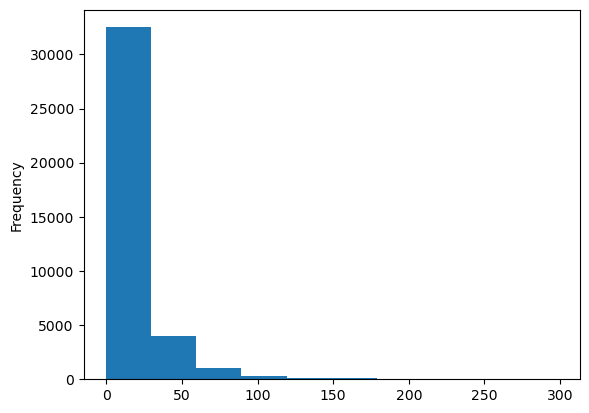

In [7]:
df.Days_in_Shelter.plot.hist()

## Animal Gender

In [8]:
df.Sex.unique()

array(['MALE', 'FEMALE', 'UNKNOWN', 'Unknown'], dtype=object)

## Animal Breed

In [9]:
print(f'there are {len(df.Breed.unique())} unique breeds')
cat_breed_count = len(df.Breed[df.Type=='CAT'].unique())
print(f'cat breeds: {cat_breed_count}')
dog_breed_count = len(df.Breed[df.Type=='DOG'].unique())
print(f'dog breeds: {dog_breed_count}')

there are 977 unique breeds
cat breeds: 65
dog breeds: 912


In [10]:
df.Type.value_counts()

Type
DOG    24930
CAT    13252
Name: count, dtype: int64

Text(0.5, 1.0, 'CAT Breeds')

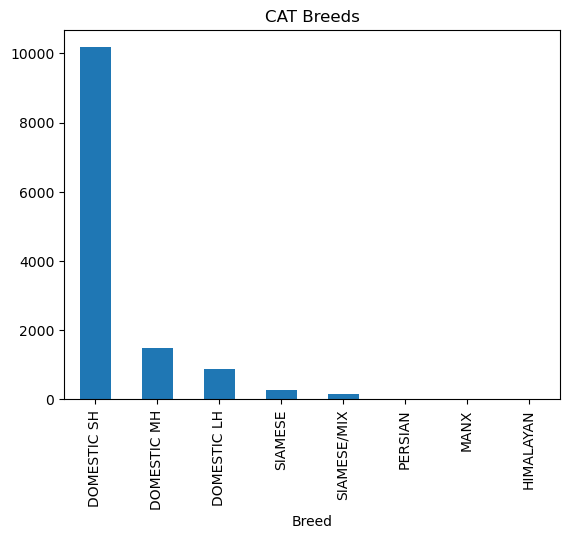

In [11]:
df[df.Type=='CAT'].Breed.value_counts()[0:8].plot.bar()
plt.title('CAT Breeds')

Text(0.5, 1.0, 'DOG Breeds')

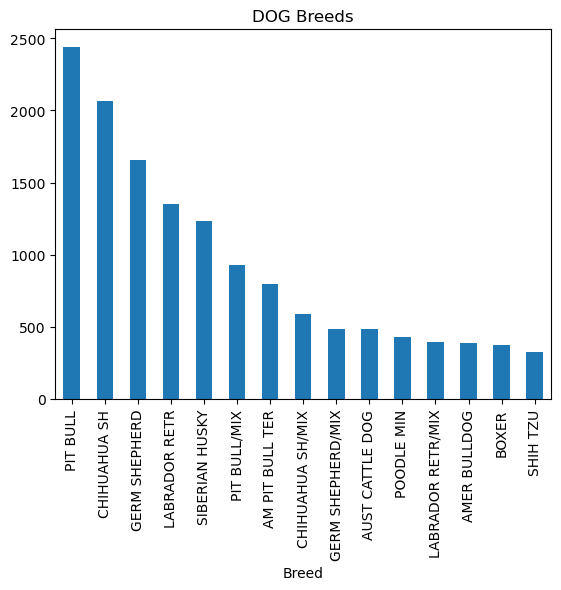

In [12]:
df[df.Type=='DOG'].Breed.value_counts()[0:15].plot.bar()
plt.title('DOG Breeds')

## Animal Type

In [13]:
df.Type.unique()

array(['DOG', 'CAT'], dtype=object)

## Animal Size

Text(0.5, 1.0, 'CAT Sizes')

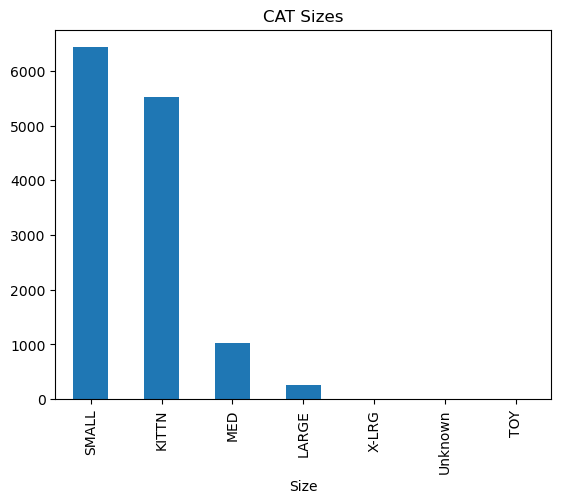

In [14]:
df[df.Type=='CAT'].Size.value_counts().plot.bar()
plt.title('CAT Sizes')

Text(0.5, 1.0, 'DOG Sizes')

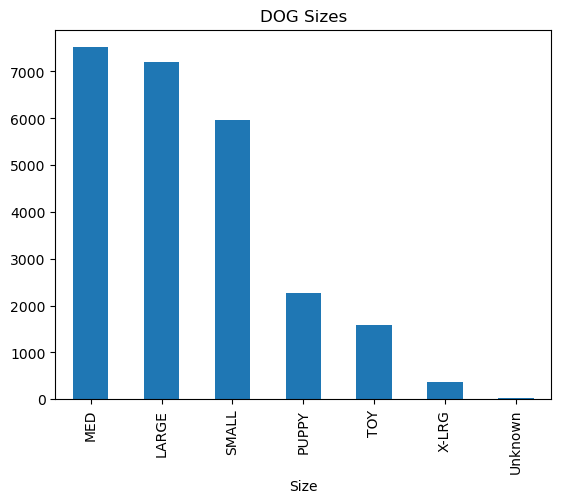

In [15]:
df[df.Type=='DOG'].Size.value_counts().plot.bar()
plt.title('DOG Sizes')

## What colors do we have?

In [16]:
print(f'there are {len(df.Color.unique())} unique colors')
breed_color = len(df.Color[df.Type=='CAT'].unique())
print(f'cat colors: {breed_color}')
breed_color = len(df.Color[df.Type=='DOG'].unique())
print(f'dog colors: {breed_color}')
print()
print(df.Color.value_counts())

there are 329 unique colors
cat colors: 178
dog colors: 216

Color
BLACK              6039
WHITE              3147
BLACK/WHITE        2952
TAN                2364
BRN TABBY          2026
                   ... 
BROWN/TRICOLOR        1
GRAY/RED              1
TRICOLOR/GRAY         1
WHITE/BLUE TICK       1
LYNX PT/TAN           1
Name: count, Length: 329, dtype: int64


Text(0.5, 1.0, 'DOG colors')

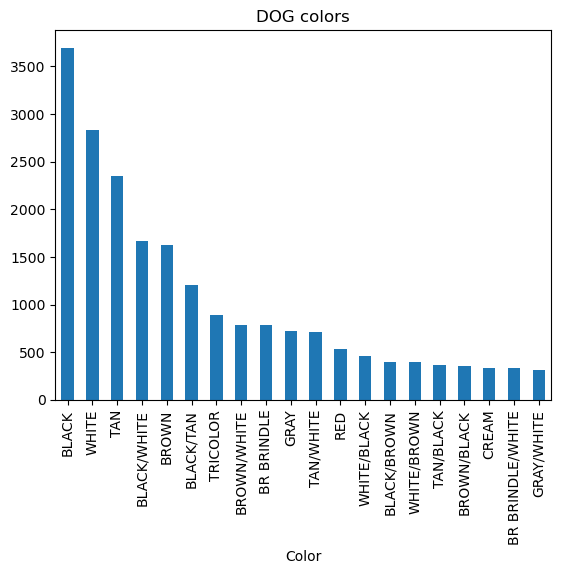

In [17]:
df[df.Type=='DOG'].Color.value_counts()[:20].plot.bar()
plt.title('DOG colors')

Text(0.5, 1.0, 'cat colors')

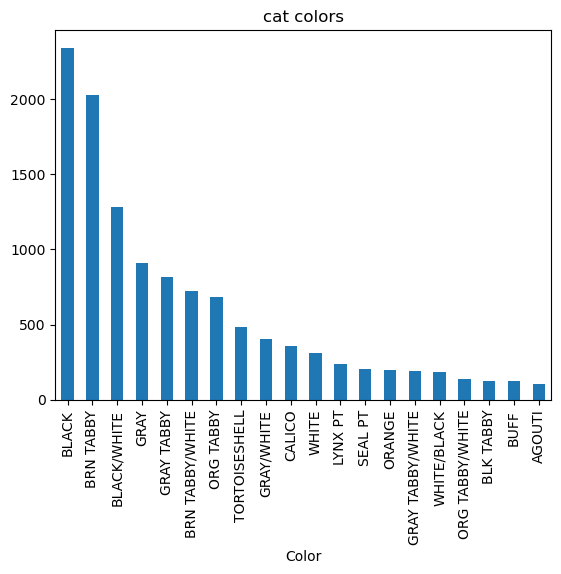

In [18]:
df[df.Type=='CAT'].Color.value_counts()[:20].plot.bar()
plt.title('cat colors')

## Intake Type is skewed

Text(0.5, 1.0, 'intake type')

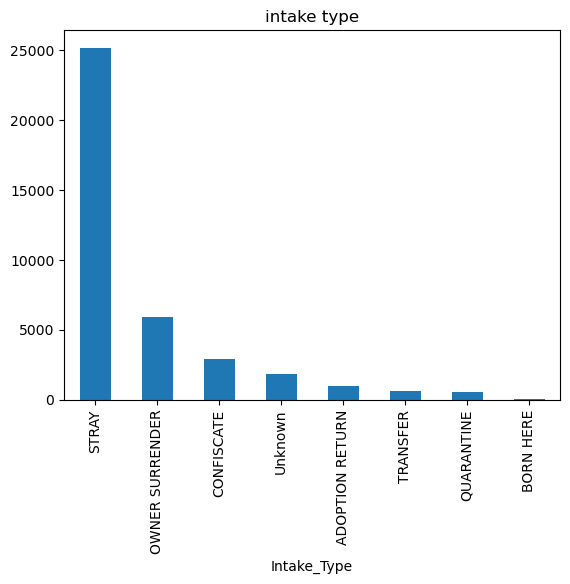

In [19]:
df.Intake_Type.value_counts().plot.bar()
plt.title('intake type')

Text(0.5, 1.0, 'intake subtype')

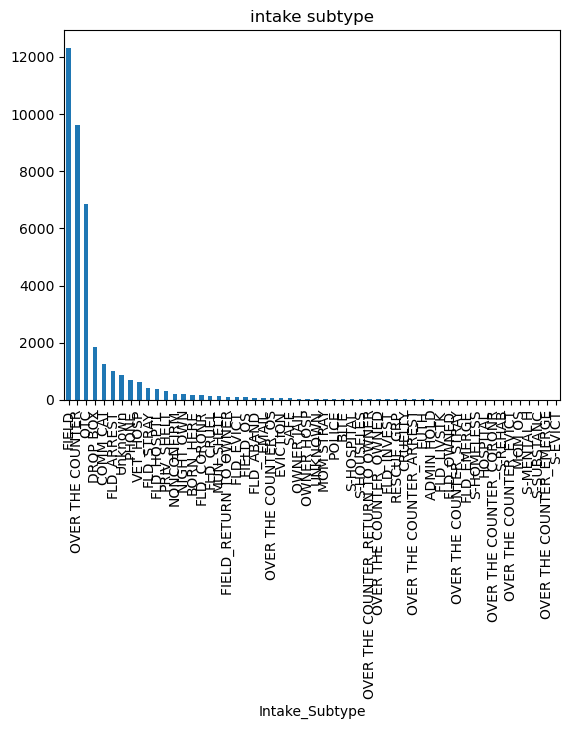

In [20]:
df.Intake_Subtype.value_counts().plot.bar()
plt.title('intake subtype')

## Most animals are not euthanized, but there are still a lot of animals in this category

Text(0.5, 1.0, 'Outcome type')

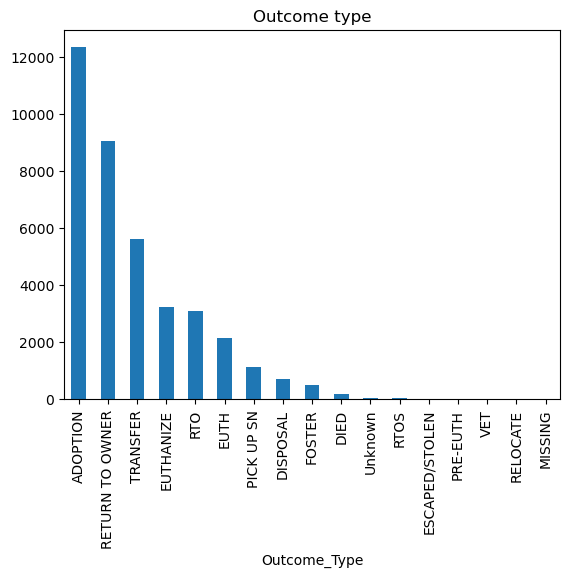

In [21]:
df.Outcome_Type.value_counts().plot.bar()
plt.title('Outcome type')

## outcome subtype has so many options. could be interesting to use NLP here

In [22]:
len(df.Outcome_Subtype.unique())

293

Text(0.5, 1.0, 'Outcome subtype')

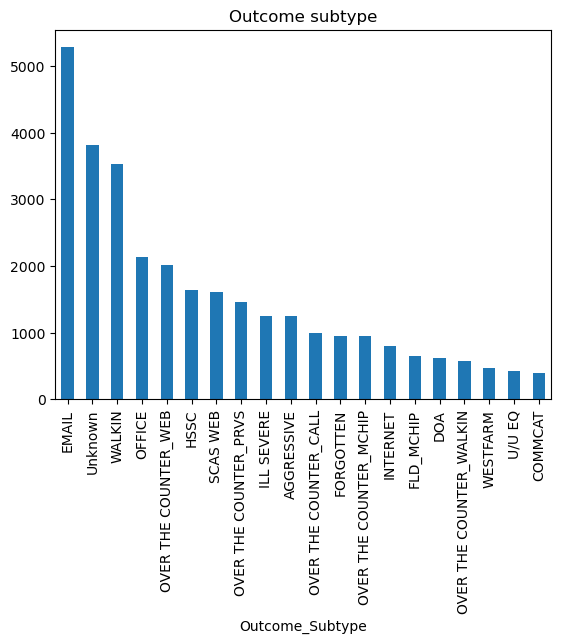

In [23]:
df.Outcome_Subtype.value_counts()[:20].plot.bar()
plt.title('Outcome subtype')

## most animals come in healthy, when is condition be unknown?

Text(0.5, 1.0, 'Intake_Condition')

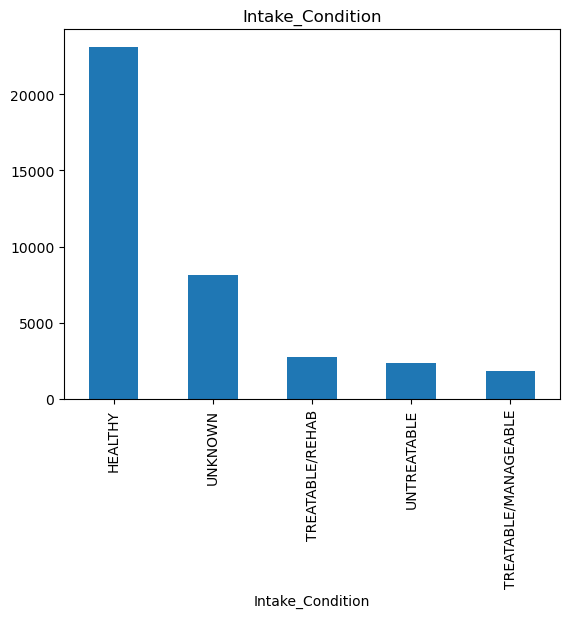

In [24]:
df.Intake_Condition.value_counts()[:20].plot.bar()
plt.title('Intake_Condition')

## it appears going to a shelter usually improves health

what does pending mean?

Text(0.5, 1.0, 'Outcome_Condition')

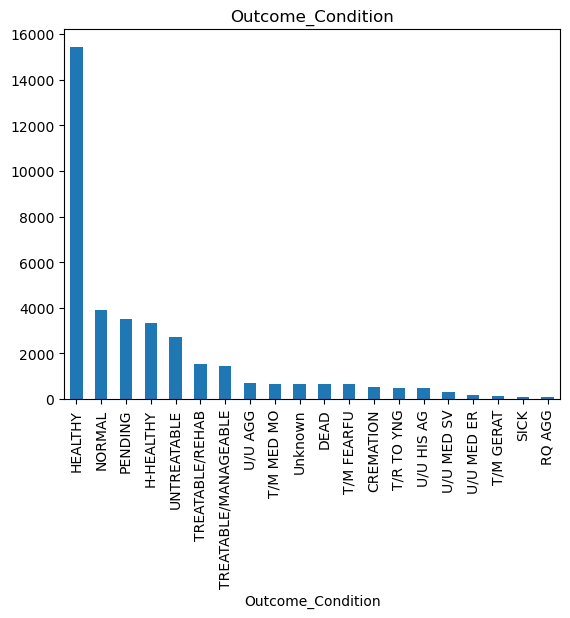

In [25]:
df.Outcome_Condition.value_counts()[:20].plot.bar()
plt.title('Outcome_Condition')

In [26]:
df.Intake_Jurisdiction.unique()

array(['Unknown', 'COUNTY', 'SANTA ROSA', '*WINDSOR', 'OUT OF COUNTY',
       '*ROHNERT PARK', '*PETALUMA', '*SEBASTOPOL', '*HEALDSBURG',
       'UNKNOWN', '*TRIBAL RESV', '*SONOMA', '*CLOVERDALE', '*COTATI'],
      dtype=object)

In [27]:
df[df.Outcome_Jurisdiction != df.Intake_Jurisdiction]

,Name,Type,Breed,Color,Sex,Size,Date_Of_Birth,Impound_Number,Kennel_Number,Animal_ID,...,Is_Mixed_Breed,Is_Multicolor,dataset,Color_Embedding,Color_Embedding_Cluster,Breed_Embedding,Breed_Embedding_Cluster,Intake_Subtype_Embedding,Subtype_Embedding_Cluster,Days_in_Shelter_Label
1,SWISHER,DOG,PIT BULL/MIX,BROWN,MALE,LARGE,1900-01-01 00:00:00,K17-022228,DQ115,A346265,...,1.0,0.0,Sonoma,"[-0.88497, 0.71685, -0.40379, -0.10698, 0.8145...",0,"[-0.13813667, -0.0065186, -0.28562, -0.0864446...",2,"[0.094735, -0.009034991, 0.335195, 0.38953298,...",4,3
3,Unknown,CAT,DOMESTIC MH,WHITE/BLACK,MALE,SMALL,1900-01-01 00:00:00,K15-012610,CI01,A316279,...,0.0,1.0,Sonoma,"[-0.82454, 0.72727, -0.58195996, -0.280925, 0....",0,"[-0.30035847, -0.179304, 0.416619, 0.15187001,...",1,"[-0.063015, 0.03347501, -0.3967, 0.57738, 0.52...",4,2
6,Unknown,DOG,BOXER/MIX,BROWN/WHITE,MALE,MED,2014-02-13 00:00:00,K18-027269,DS60,A368099,...,1.0,1.0,Sonoma,"[-0.785745, 0.75905, -0.508095, -0.12909, 0.90...",0,"[-0.9753, -0.1526435, -0.3553695, 0.3573815, -...",3,"[-0.49284, 0.3731, 0.15565, 0.70044, 0.77405, ...",0,1
8,*JOEY,DOG,CHIHUAHUA SH,WHITE/TAN,MALE,TOY,2011-05-11 00:00:00,K14-008797,DA46,A306525,...,0.0,1.0,Sonoma,"[-0.52346, 0.562445, -0.68111503, 0.399905, 0....",2,"[0.130645, -0.560145, 0.16823497, 0.5767175, -...",4,"[1.036875, 0.22911, 0.457605, -0.513265, 0.574...",2,3
11,SEQUOIA,DOG,PIT BULL/RHOD RIDGEBACK,RED,FEMALE,LARGE,2005-05-12 00:00:00,K16-021353,DS68,A209596,...,1.0,0.0,Sonoma,"[-0.12878, 0.8798, -0.60694, 0.12934, 0.5868, ...",0,"[-0.1893, -0.59979725, -0.78477, 0.15652975, -...",3,"[-0.49284, 0.3731, 0.15565, 0.70044, 0.77405, ...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38159,ROCKY,DOG,BEAGLE/FOX TERR SMOOTH,BROWN/WHITE,MALE,MED,2014-02-26 00:00:00,K17-022736,DS71,A324649,...,1.0,1.0,Sonoma,"[-0.785745, 0.75905, -0.508095, -0.12909, 0.90...",0,"[0.51475453, 0.09585275, -0.0010877401, -0.021...",3,"[-0.49284, 0.3731, 0.15565, 0.70044, 0.77405, ...",0,0
38162,Unknown,DOG,PIT BULL/MIX,TAN,MALE,MED,2005-12-24 00:00:00,K14-012128,DQ111,A314998,...,1.0,0.0,Sonoma,"[-0.3604, 0.32364, -0.74983, 0.95101, 0.49193,...",3,"[-0.13813667, -0.0065186, -0.28562, -0.0864446...",2,"[-0.49284, 0.3731, 0.15565, 0.70044, 0.77405, ...",0,1
38164,*HAROLD,DOG,CAIRN TERRIER,BROWN,MALE,SMALL,2016-04-01 00:00:00,K20-035682,DS68,A397007,...,0.0,0.0,Sonoma,"[-0.88497, 0.71685, -0.40379, -0.10698, 0.8145...",0,"[0.03655, 0.399345, -0.222705, 0.33942002, 0.5...",3,"[0.9501, 0.21494, -0.16403449, -0.70076, -0.15...",2,2
38165,GIRL,DOG,PIT BULL,BLUE,FEMALE,MED,2012-12-21 00:00:00,K15-013356,DI105,A313111,...,0.0,0.0,Sonoma,"[-0.83751, 0.69563, -0.51408, 0.23689, 0.59192...",0,"[0.095295, 0.0053056004, -0.11658999, -0.14415...",2,"[-0.49284, 0.3731, 0.15565, 0.70044, 0.77405, ...",0,2


## Thoughts
There are many categories for breed, color and outcome subtype. Perhaps too many. We may need to feature engineer these columns to group similar colors

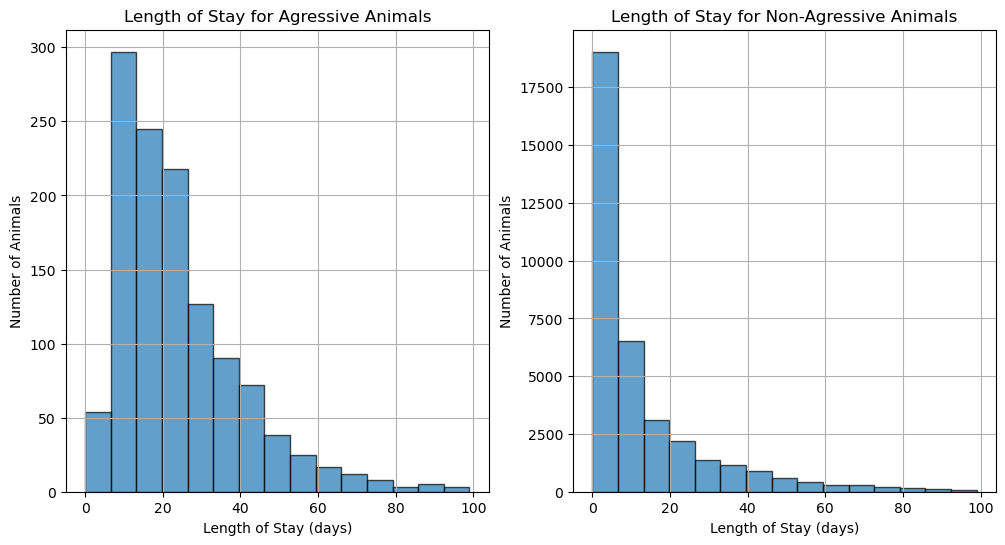

In [28]:
# Log transformation of the length of stay
df['Log Length of Stay'] = np.log1p(df['Days_in_Shelter'])  # log1p is used to handle log(0)

# Separate df for cats and dogs
agressive = df[df['Is_Aggressive'] == 1]
not_aggressive = df[df['Is_Aggressive'] == 0]

# Plot the log-transformed length of stay for cats
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(agressive[agressive.Days_in_Shelter<100]['Days_in_Shelter'].dropna(), bins=15, edgecolor='k', alpha=0.7)
plt.title('Length of Stay for Agressive Animals')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Animals')
plt.grid(True)

# Plot the log-transformed length of stay for dogs
plt.subplot(1, 2, 2)
plt.hist(not_aggressive[not_aggressive.Days_in_Shelter<100]['Days_in_Shelter'].dropna(), bins=15, edgecolor='k', alpha=0.7)
plt.title('Length of Stay for Non-Agressive Animals')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Animals')
plt.grid(True)


In [29]:
popular_breeds = df.Breed.value_counts().reset_index().head(11)

breed1 = popular_breeds.Breed.iloc[1]
for i in range(popular_breeds.shape[0]):
    breed2 = popular_breeds.Breed.iloc[i]
    vec1 = df[df.Breed==breed1].iloc[0].Breed_Embedding.reshape(1, -1)
    vec2 = df[df.Breed==breed2].iloc[0].Breed_Embedding.reshape(1, -1)
    similarity = cosine_similarity(vec1, vec2)[0][0]

    print(f"Cosine similarity between {breed1} and {breed2}: {similarity}")


Cosine similarity between PIT BULL and DOMESTIC SH: 0.21472840011119843
Cosine similarity between PIT BULL and PIT BULL: 1.0
Cosine similarity between PIT BULL and CHIHUAHUA SH: 0.08315540850162506
Cosine similarity between PIT BULL and GERM SHEPHERD: 0.3103894591331482
Cosine similarity between PIT BULL and DOMESTIC MH: 0.1275845468044281
Cosine similarity between PIT BULL and LABRADOR RETR: 0.18866603459188988
Cosine similarity between PIT BULL and SIBERIAN HUSKY: 0.17136384546756744
Cosine similarity between PIT BULL and PIT BULL/MIX: 0.8793880343437195
Cosine similarity between PIT BULL and DOMESTIC LH: 0.23789280652999878
Cosine similarity between PIT BULL and AM PIT BULL TER: 0.7649133801460266
Cosine similarity between PIT BULL and CHIHUAHUA SH/MIX: 0.21361185610294342


In [30]:
embeddings = np.array(df.Breed_Embedding.tolist())

# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Apply KMeans clustering
n_clusters = 5  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(reduced_embeddings)

# Create a DataFrame for the reduced embeddings
df_embeddings = pd.DataFrame(reduced_embeddings, columns=['PC1', 'PC2'])
df_embeddings['Breed'] = df.Breed
df_embeddings['Cluster'] = clusters

for cluster in df_embeddings['Cluster'].unique():
    popular_breeds = df_embeddings[df_embeddings.Cluster==cluster].Breed.value_counts().reset_index().head(4)
    breed1 = popular_breeds.Breed.iloc[1]
    for i in range(popular_breeds.shape[0]):
        breed2 = popular_breeds.Breed.iloc[i]
        vec1 = df[df.Breed==breed1].iloc[0].Breed_Embedding.reshape(1, -1)
        vec2 = df[df.Breed==breed2].iloc[0].Breed_Embedding.reshape(1, -1)
        similarity = cosine_similarity(vec1, vec2)[0][0]

        print(f"Cluster {cluster} Cosine similarity between {breed1} and {breed2}: {similarity}")
    print('')

Cluster 4 Cosine similarity between SIBERIAN HUSKY and LABRADOR RETR: 0.5724721126045761
Cluster 4 Cosine similarity between SIBERIAN HUSKY and SIBERIAN HUSKY: 1.000000238418579
Cluster 4 Cosine similarity between SIBERIAN HUSKY and POODLE MIN: 0.2257753312587738
Cluster 4 Cosine similarity between SIBERIAN HUSKY and LABRADOR RETR/MIX: 0.4779170711265153

Cluster 3 Cosine similarity between PIT BULL/MIX and PIT BULL: 0.8793880343437195
Cluster 3 Cosine similarity between PIT BULL/MIX and PIT BULL/MIX: 0.9999999403953552
Cluster 3 Cosine similarity between PIT BULL/MIX and AM PIT BULL TER: 0.7106812000274658
Cluster 3 Cosine similarity between PIT BULL/MIX and AMERICAN STAFF: 0.3819878101348877

Cluster 1 Cosine similarity between DOMESTIC MH and DOMESTIC SH: 0.8345993161201477
Cluster 1 Cosine similarity between DOMESTIC MH and DOMESTIC MH: 1.0000001192092896
Cluster 1 Cosine similarity between DOMESTIC MH and DOMESTIC LH: 0.6407502293586731
Cluster 1 Cosine similarity between DOMESTIC

/Users/robchimel/opt/anaconda3/envs/cv_281_3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
popular_colors = df.Color.value_counts().reset_index().head(11)

color1 = popular_colors.Color.iloc[1]
for i in range(popular_colors.shape[0]):
    color2 = popular_colors.Color.iloc[i]
    vec1 = df[df.Color==color1].iloc[0].Color_Embedding.reshape(1, -1)
    vec2 = df[df.Color==color2].iloc[0].Color_Embedding.reshape(1, -1)
    similarity = cosine_similarity(vec1, vec2)[0][0]

    print(f"Cosine similarity between {color1} and {color2}: {similarity}")


Cosine similarity between WHITE and BLACK: 0.9058136343955994
Cosine similarity between WHITE and WHITE: 1.0
Cosine similarity between WHITE and BLACK/WHITE: 0.9765756726264954
Cosine similarity between WHITE and TAN: 0.41579315066337585
Cosine similarity between WHITE and BRN TABBY: 0.010366884060204029
Cosine similarity between WHITE and BROWN: 0.8609011769294739
Cosine similarity between WHITE and GRAY: 0.8613420724868774
Cosine similarity between WHITE and BLACK/TAN: 0.8150209188461304
Cosine similarity between WHITE and TRICOLOR: 0.17287729680538177
Cosine similarity between WHITE and GRAY TABBY: 0.7290171384811401
Cosine similarity between WHITE and BROWN/WHITE: 0.9680684804916382
